# **CLASSIFICAZIONE DIABETE**

In [169]:
# Importing some dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [170]:
#Loading the dataset
train_dataset = pd.read_csv('dataset/diabetes_train.csv')
columns = train_dataset.columns
test_dataset = pd.read_csv('dataset/diabetes_test.csv')

In [171]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   588 non-null    object 
 1   age                      588 non-null    float64
 2   hypertension             588 non-null    int64  
 3   heart_disease            588 non-null    int64  
 4   smoking_history          588 non-null    object 
 5   bmi                      588 non-null    float64
 6   HbA1c_level              588 non-null    float64
 7   blood_glucose_level      588 non-null    float64
 8   Insulin_Sensitivity_Est  477 non-null    float64
 9   BMI_Glucose_Interaction  588 non-null    float64
 10  Random_Lab_Marker        588 non-null    float64
 11  diabetes                 588 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 55.3+ KB


In [172]:
train_dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,64.822537,0,0,never,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,Male,59.912290,1,0,never,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,Male,67.853267,0,0,former,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,Male,57.985607,0,0,never,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,Male,70.278133,0,0,current,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,19.354174,0,0,former,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,Female,70.000000,0,0,not current,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,Male,60.000000,0,1,current,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,Female,27.000000,0,0,No Info,27.320000,6.000000,200.000000,NaN,5464.000000,60.704415,0


### **DATA EXPLORATION**

In [173]:
# Do we have any missing values in the train dataset?
train_dataset.replace(to_replace="", value = np.nan, inplace=True)
null_values_train = train_dataset.isnull().sum()
print("Null values in train dataset:", null_values_train)

Null values in train dataset: gender                       0
age                          0
hypertension                 0
heart_disease                0
smoking_history              0
bmi                          0
HbA1c_level                  0
blood_glucose_level          0
Insulin_Sensitivity_Est    111
BMI_Glucose_Interaction      0
Random_Lab_Marker            0
diabetes                     0
dtype: int64


In [174]:
# Do we have any missing values in the test dataset?
test_dataset.replace(to_replace="", value = np.nan, inplace=True)
null_values_test = test_dataset.isnull().sum()
print("Null values in train dataset:", null_values_test)

Null values in train dataset: gender                      0
age                         0
hypertension                0
heart_disease               0
smoking_history             0
bmi                         0
HbA1c_level                 0
blood_glucose_level         0
Insulin_Sensitivity_Est    26
BMI_Glucose_Interaction     0
Random_Lab_Marker           0
diabetes                    0
dtype: int64


In [175]:
# Check if we have any duplicates in the train dataset
duplicates_train = train_dataset.duplicated().sum()
print("Duplicates in train dataset:", duplicates_train)

# Check if we have any duplicates in the test dataset
duplicates_test = test_dataset.duplicated().sum()
print("Duplicates in test dataset:", duplicates_test)

Duplicates in train dataset: 59
Duplicates in test dataset: 5


In [176]:
# We are going to check how many duplicates we have in the train dataset that are diabetic patients
idx = train_dataset.duplicated(keep='first')
idx = train_dataset[idx].index
count = train_dataset.loc[idx, 'diabetes'].sum()
print('Duplicates in train dataset that are diabetic patients:', count)

# We decided to drop the duplicates in the train dataset
train_dataset.drop_duplicates(inplace=True)

Duplicates in train dataset that are diabetic patients: 6


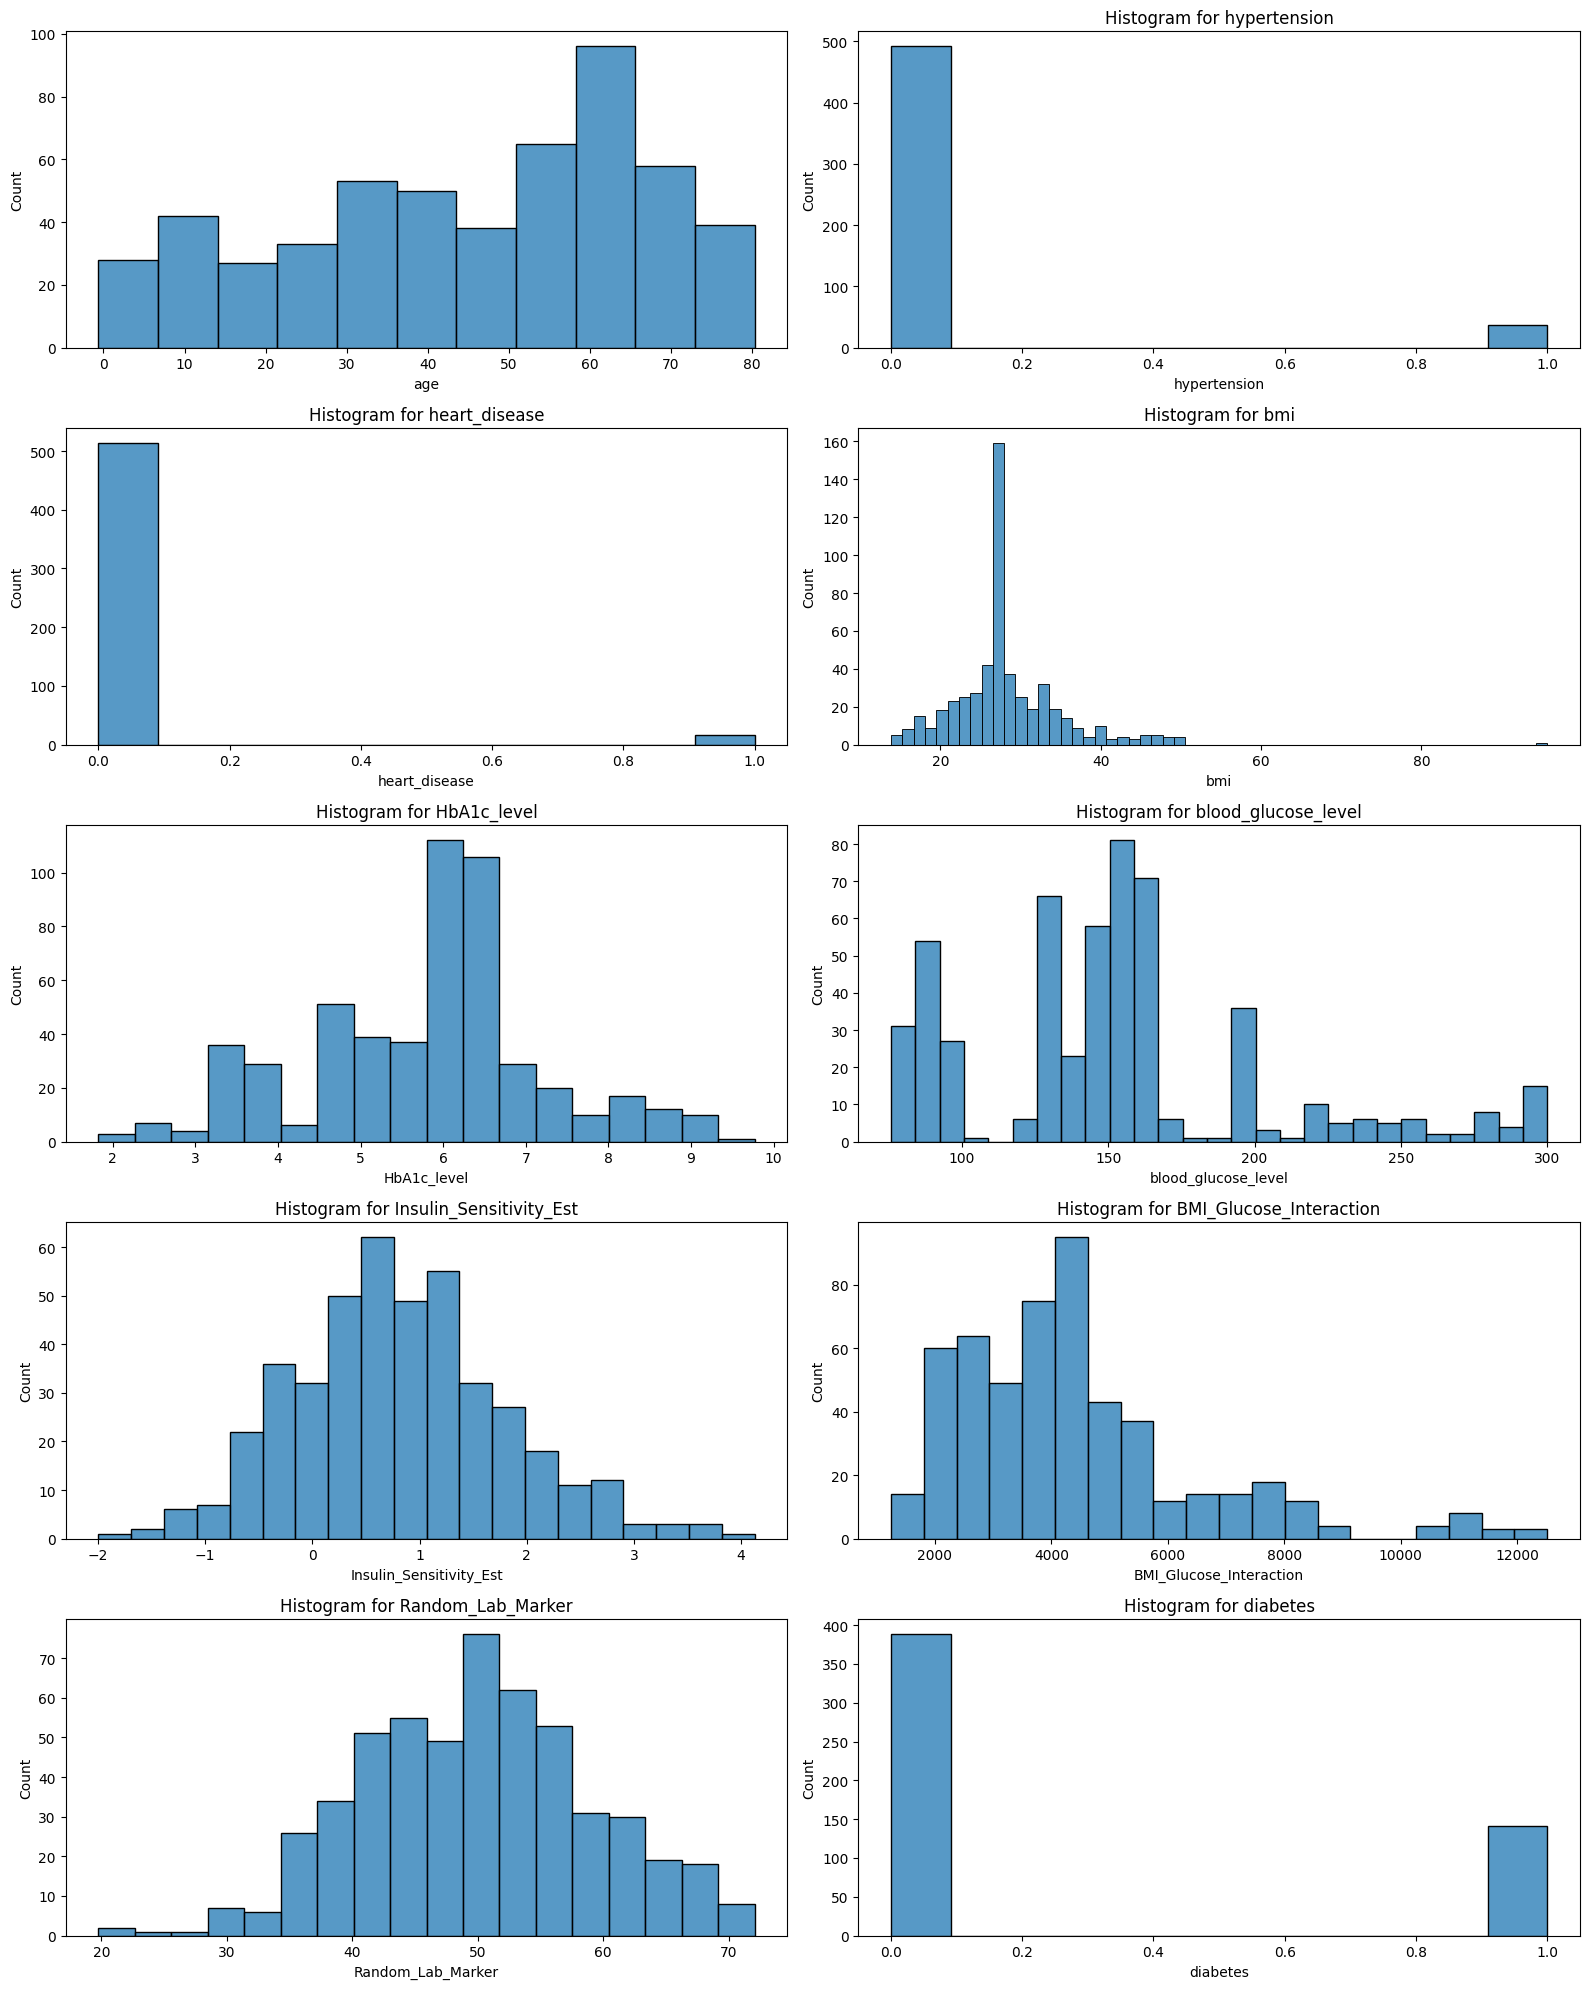

In [177]:
# Displaying 3 boxplots for row
cols_per_row = 2
numerical_columns = train_dataset.columns
numerical_columns = numerical_columns.drop('gender')
numerical_columns = numerical_columns.drop('smoking_history')

rows = (len(numerical_columns) + cols_per_row - 1) // cols_per_row

# Create a grid of boxplots using seaborn
fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    if column == 'age':
        sns.histplot(x=train_dataset[column], ax=axes[i])
    else:
        sns.histplot(x=train_dataset[column], ax=axes[i])
        axes[i].set_title(f'Histogram for {column}')
        axes[i].set_xlabel(column)

for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


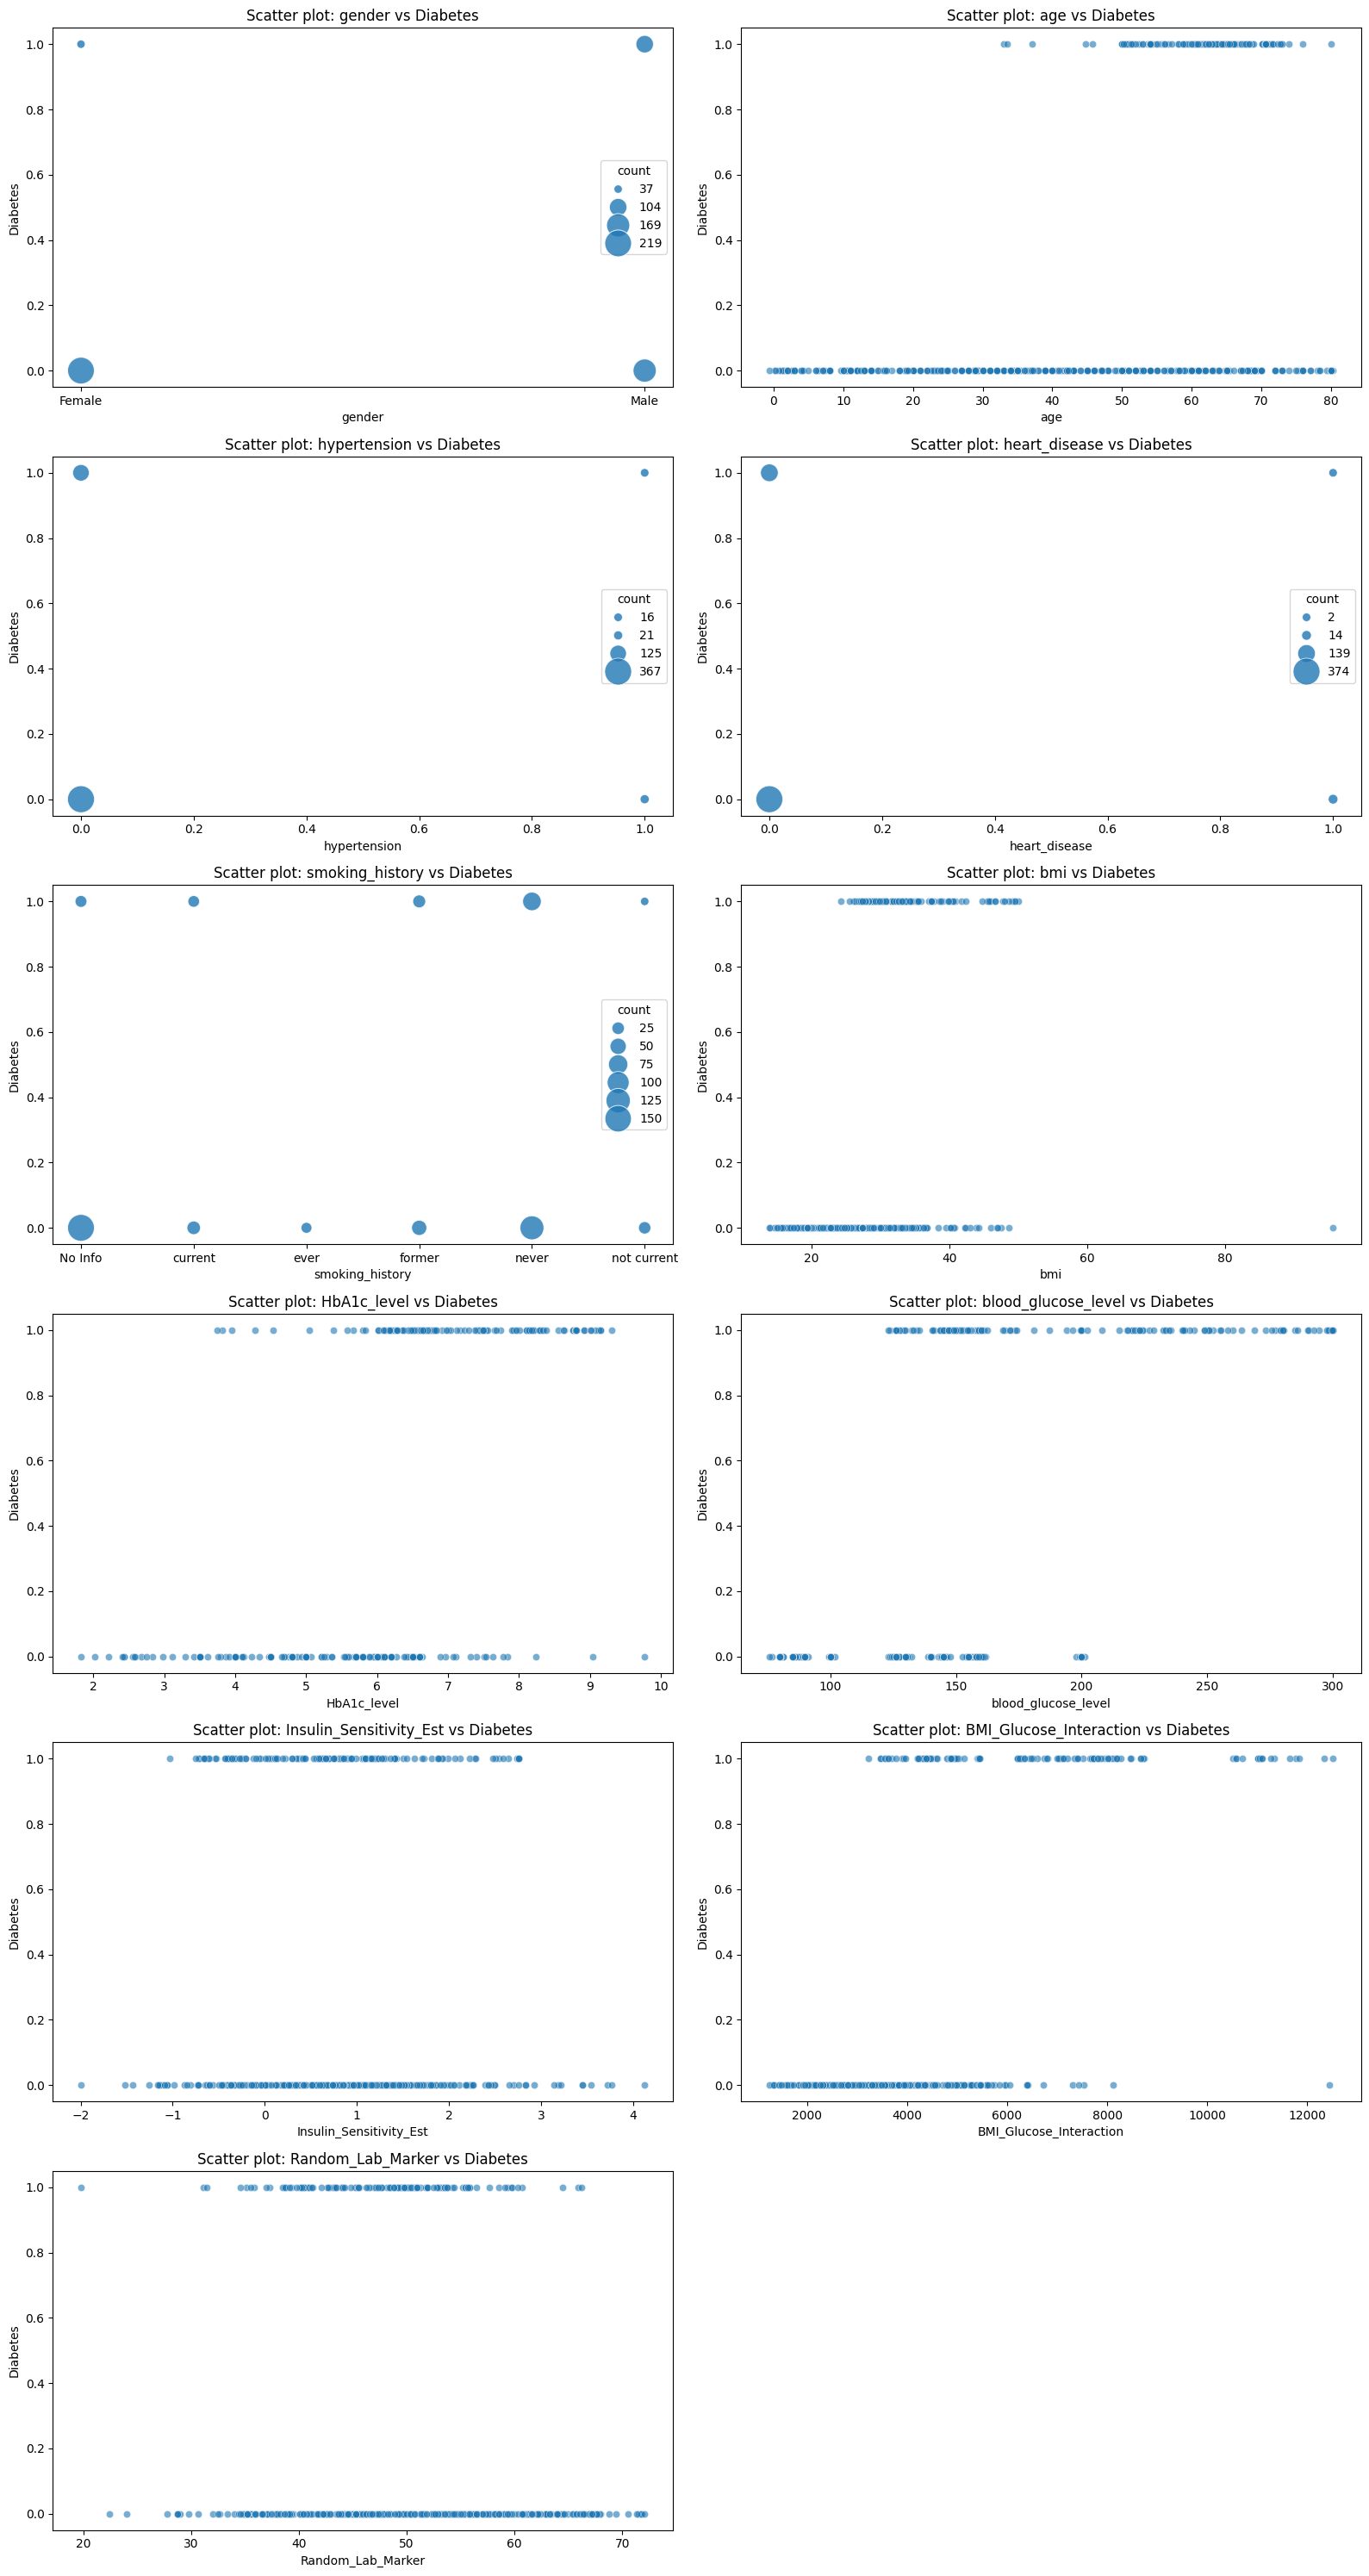

In [178]:
# Creazione di scatter plot per ogni feature rispetto alla variabile 'diabetes'
features = [col for col in train_dataset.columns if col != 'diabetes']
cols_per_row = 2
rows = (len(features) + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    if train_dataset[feature].nunique() <= 6:  # Variabili binarie
        # Raggruppa i dati per contare le istanze
        grouped = train_dataset.groupby([feature, 'diabetes']).size().reset_index(name='count')
        sns.scatterplot(
            data=grouped,
            x=feature,
            y='diabetes',
            size='count',
            sizes=(50, 500),  # Aumenta la dimensione minima e massima dei puntini
            ax=axes[i],
            alpha=0.8  # Aumenta la trasparenza per una migliore sovrapposizione
        )
    else:
        sns.scatterplot(
            data=train_dataset,
            x=feature,
            y='diabetes',
            ax=axes[i],
            alpha=0.6
        )
    axes[i].set_title(f'Scatter plot: {feature} vs Diabetes')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Diabetes')

# Disattiva gli assi vuoti se il numero di grafici è dispari
for i in range(len(features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Da questi istogrammi possiamo fare alcune considerazioni:
1. Risultano delle righe con un età associata negativa, potremmo eliminare quelle righe dal dataset;
2. Risulta un record con un bmi superiore a 80, abbiamo deciso di tenerlo;
3. Essendo che le feature hanno domini molto diversi da loro dovremo effettuare una normalizzazione.

In [179]:
# Displaying the rows of the train dataset with the negative values of 'age'
train_dataset[train_dataset['age'] < 0]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
439,Male,-0.618799,0,0,No Info,26.739199,5.982008,76.886372,0.392354,2185.6,49.634084,0


In [180]:
# Displaying the rows of the train dataset with the high values of 'bmi'
train_dataset[train_dataset['bmi'] > 80]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
520,Male,7.0,0,0,No Info,95.69,6.1,130.0,1.857169,12439.7,54.52723,0


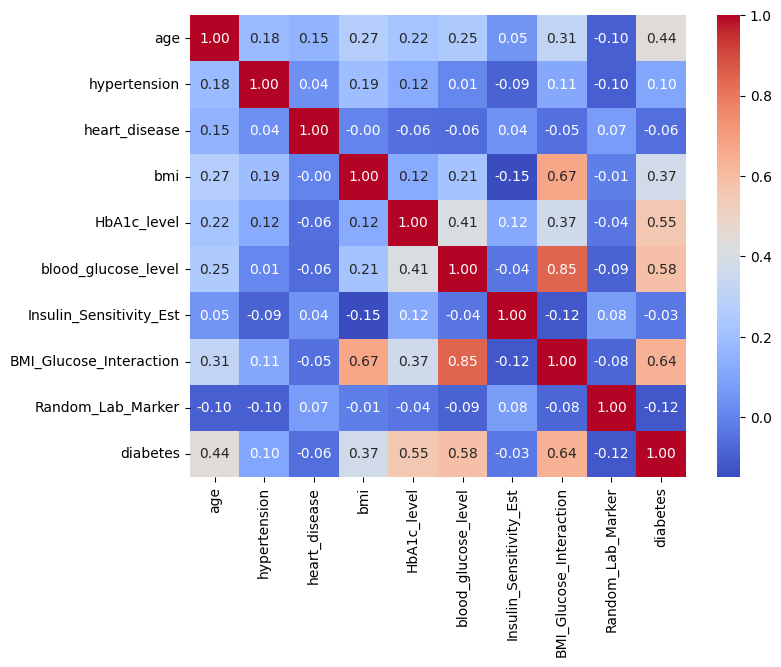

In [181]:
# We can look at the correlation between features
labels = train_dataset.columns
correlation_matrix = train_dataset[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [182]:
# We are dropping the column 'BMI_Glucose_Interaction' because it has a high correlation with 'BMI' and 'glucose'
train_dataset.drop(columns=['BMI_Glucose_Interaction'], inplace=True)
test_dataset.drop(columns=['BMI_Glucose_Interaction'], inplace=True)
columns = train_dataset.columns

### **PRE-PROCESSING**

In [183]:
# Some domain costraints

train_dataset = train_dataset[ 
    (train_dataset['age'] >= 0) &
    (train_dataset['bmi'] >= 0) & (train_dataset['bmi'] < 90) &
    (train_dataset['blood_glucose_level'] >= 0) & 
    (train_dataset['HbA1c_level'] >= 0)
]

test_dataset = test_dataset[
    (test_dataset['age'] >= 0) &
    (test_dataset['bmi'] >= 0) & (test_dataset['bmi'] < 90) &
    (test_dataset['blood_glucose_level'] >= 0) & 
    (test_dataset['HbA1c_level'] >= 0)
]

Innanzitutto, dobbiamo trasformare le variabili categoriche in numeriche. Per farlo abbiamo bisogno di sapere i valori che assumono e come questi sono distribuiti nel dataset di training.

In [184]:
train_dataset['smoking_history'].value_counts()

smoking_history
never          189
No Info        173
former          69
current         51
not current     29
ever            16
Name: count, dtype: int64

In [185]:
train_dataset['gender'].value_counts()

gender
Male      271
Female    256
Name: count, dtype: int64

In [186]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder_gender = LabelEncoder()
train_dataset['gender'] = label_encoder_gender.fit_transform(train_dataset['gender'])

label_encoder_smoking = {
    "never": 0,
    "No Info": 1,
    "former": 2,
    "not current": 3,
    "ever": 4,
    "current": 5
}

train_dataset["smoking_history"] = train_dataset["smoking_history"].map(label_encoder_smoking)

# Applying the same encoding to the test dataset
test_dataset['gender'] = label_encoder_gender.transform(test_dataset['gender'])
test_dataset["smoking_history"] = test_dataset["smoking_history"].map(label_encoder_smoking)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14816\953669884.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset['gender'] = label_encoder_gender.fit_transform(train_dataset['gender'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14816\953669884.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset["smoking_history"] = train_dataset["smoking_history"].map(label_encoder_smoking)


In [187]:
train_dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker,diabetes
0,1,64.822537,0,0,0,27.097915,6.517746,157.338059,1.220942,38.820127,1
1,1,59.912290,1,0,0,33.206670,7.971341,148.625701,0.807652,40.381336,1
2,1,67.853267,0,0,2,30.639790,8.919297,240.733664,1.225950,55.789060,1
3,1,57.985607,0,0,0,32.609541,8.759698,154.640163,1.432736,40.877685,1
4,1,70.278133,0,0,5,37.703827,6.261874,169.415511,0.684205,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...
583,0,19.354174,0,0,2,28.670601,5.248329,160.905601,0.959618,52.632201,0
584,0,70.000000,0,0,3,24.750000,3.500000,159.000000,-1.084071,43.652306,0
585,1,60.000000,0,1,5,29.050000,5.800000,145.000000,-0.468180,58.503956,0
586,0,27.000000,0,0,1,27.320000,6.000000,200.000000,NaN,60.704415,0


In [188]:
# Normalizing the data in the [0;1] range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_dataset = scaler.fit_transform(train_dataset)
test_dataset = scaler.transform(test_dataset)

In [189]:
train_dataset = pd.DataFrame(train_dataset, columns=columns)
train_dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker,diabetes
0,1.0,0.806992,0.0,0.0,0.0,0.365992,0.590557,0.363743,0.525422,0.364301,1.0
1,1.0,0.745787,1.0,0.0,0.0,0.534882,0.773548,0.324886,0.457908,0.394142,1.0
2,1.0,0.844769,0.0,0.0,0.4,0.463915,0.892885,0.735678,0.526240,0.688649,1.0
3,1.0,0.721772,0.0,0.0,0.0,0.518373,0.872793,0.351710,0.560020,0.403630,1.0
4,1.0,0.874994,0.0,0.0,1.0,0.659216,0.558346,0.417607,0.437742,0.648169,1.0
...,...,...,...,...,...,...,...,...,...,...,...
522,0.0,0.240245,0.0,0.0,0.4,0.409472,0.430752,0.379654,0.482733,0.628308,0.0
523,0.0,0.871527,0.0,0.0,0.6,0.301078,0.210658,0.371155,0.148883,0.456664,0.0
524,1.0,0.746880,0.0,1.0,1.0,0.419961,0.500201,0.308716,0.249493,0.740542,0.0
525,0.0,0.335548,0.0,0.0,0.2,0.372132,0.525379,0.554010,NaN,0.782602,0.0


In [190]:
# Replacing the missing values in the training dataset with the mean of the train dataset
from sklearn.impute import SimpleImputer

imputer_ISE = SimpleImputer(strategy='mean')
train_dataset = imputer_ISE.fit_transform(train_dataset)
test_dataset = imputer_ISE.transform(test_dataset)

train_dataset = pd.DataFrame(train_dataset, columns=columns)
train_dataset

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker,diabetes
0,1.0,0.806992,0.0,0.0,0.0,0.365992,0.590557,0.363743,0.525422,0.364301,1.0
1,1.0,0.745787,1.0,0.0,0.0,0.534882,0.773548,0.324886,0.457908,0.394142,1.0
2,1.0,0.844769,0.0,0.0,0.4,0.463915,0.892885,0.735678,0.526240,0.688649,1.0
3,1.0,0.721772,0.0,0.0,0.0,0.518373,0.872793,0.351710,0.560020,0.403630,1.0
4,1.0,0.874994,0.0,0.0,1.0,0.659216,0.558346,0.417607,0.437742,0.648169,1.0
...,...,...,...,...,...,...,...,...,...,...,...
522,0.0,0.240245,0.0,0.0,0.4,0.409472,0.430752,0.379654,0.482733,0.628308,0.0
523,0.0,0.871527,0.0,0.0,0.6,0.301078,0.210658,0.371155,0.148883,0.456664,0.0
524,1.0,0.746880,0.0,1.0,1.0,0.419961,0.500201,0.308716,0.249493,0.740542,0.0
525,0.0,0.335548,0.0,0.0,0.2,0.372132,0.525379,0.554010,0.458930,0.782602,0.0


In [191]:
test_dataset = pd.DataFrame(test_dataset, columns=columns)
test_dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker,diabetes
0,1.0,0.908921,0.0,0.0,0.4,0.372132,0.877867,1.000000,0.632197,0.614459,1.0
1,0.0,0.681954,0.0,0.0,0.0,0.553666,0.299582,0.256351,0.369193,0.807127,1.0
2,1.0,0.891785,0.0,0.0,0.2,0.372545,0.873352,0.994669,0.640861,0.611949,1.0
3,1.0,0.807459,0.0,0.0,0.0,0.367632,0.588804,0.373685,0.552814,0.457983,1.0
4,0.0,0.681483,0.0,0.0,0.0,0.725193,0.559701,1.000000,0.424150,0.665463,1.0
...,...,...,...,...,...,...,...,...,...,...,...
142,0.0,0.609770,0.0,0.0,0.0,0.359967,0.399491,0.241818,0.458930,0.337801,0.0
143,0.0,0.672093,0.0,0.0,0.0,0.372132,0.487612,0.108021,0.397807,0.718318,0.0
144,0.0,0.460194,0.0,0.0,0.2,0.372132,0.399491,0.286417,0.545919,0.498462,0.0
145,0.0,0.148944,0.0,0.0,0.2,0.370648,0.287214,0.375453,0.222961,0.824775,0.0


### **MODEL SELECTION**

In [192]:
# Dividing the dataset into features and target variable
from sklearn.model_selection import train_test_split

X_train= train_dataset.drop(columns=['diabetes'])
y_train = train_dataset['diabetes']

X_test = test_dataset.drop(columns=['diabetes'])
y_test = test_dataset['diabetes']

K_FOLD = 5

#### **DECISION TREE**

In [193]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# Creating the model
model_DT = DecisionTreeClassifier(random_state=42)

# Initializing a GridSearchCV object
grid_search_DT = GridSearchCV(
    estimator = model_DT,
    param_grid={
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 20, 50],
        'min_samples_split': [2, 5, 10],
        'min_impurity_decrease': [0.001, 0.01, 0.1],
    },
    scoring='f1',
    cv=K_FOLD,
    verbose=3,  
    n_jobs=1
)

model_DT = grid_search_DT.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END criterion=gini, max_depth=10, min_impurity_decrease=0.001, min_samples_split=2;, score=0.900 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_impurity_decrease=0.001, min_samples_split=2;, score=0.847 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_impurity_decrease=0.001, min_samples_split=2;, score=0.800 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_impurity_decrease=0.001, min_samples_split=2;, score=0.873 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_impurity_decrease=0.001, min_samples_split=2;, score=0.836 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_impurity_decrease=0.001, min_samples_split=5;, score=0.900 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_impurity_decrease=0.001, min_samples_split=5;, score=0.828 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_impurity_decreas

In [194]:
results_DT = pd.DataFrame(grid_search_DT.cv_results_)
results_DT = results_DT.sort_values(by='rank_test_score', ascending=True)
results_DT.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.015604,0.000444,0.010590,0.005894,gini,10,0.001,10,"{'criterion': 'gini', 'max_depth': 10, 'min_im...",0.90000,0.842105,0.846154,0.857143,0.851852,0.859451,0.020904,1
11,0.006350,0.007778,0.006228,0.007628,gini,20,0.001,10,"{'criterion': 'gini', 'max_depth': 20, 'min_im...",0.90000,0.842105,0.846154,0.857143,0.851852,0.859451,0.020904,1
20,0.006802,0.006935,0.002997,0.005103,gini,50,0.001,10,"{'criterion': 'gini', 'max_depth': 50, 'min_im...",0.90000,0.842105,0.846154,0.857143,0.851852,0.859451,0.020904,1
30,0.008865,0.006631,0.004611,0.005173,entropy,10,0.010,2,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.83871,0.806452,0.867925,0.888889,0.892857,0.858966,0.032534,4
31,0.006223,0.005717,0.006351,0.007974,entropy,10,0.010,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.83871,0.806452,0.867925,0.888889,0.892857,0.858966,0.032534,4


In [198]:
# The resultant model is
best_model_DT = grid_search_DT.best_estimator_.fit(X_train, y_train)
y_pred_DT = best_model_DT.predict(X_train)

# We want to print the confusion matrix and the classification report
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix_DT = confusion_matrix(y_train, y_pred_DT)
confusion_matrix_DT = pd.DataFrame(confusion_matrix_DT, index=['Actual No Diabetes', 'Actual Diabetes'], columns=['Predicted No Diabetes', 'Predicted Diabetes'])
print("Confusion Matrix:\n", confusion_matrix_DT)
print()
print("Classification Report:\n", classification_report(y_train, y_pred_DT))

Confusion Matrix:
                     Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                    382                   4
Actual Diabetes                         3                 138

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       386
         1.0       0.97      0.98      0.98       141

    accuracy                           0.99       527
   macro avg       0.98      0.98      0.98       527
weighted avg       0.99      0.99      0.99       527

